# IRIS FLOWER CLASSIFICATION

In [12]:
#Loading necessary modules

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Reading the dataset

df = pd.read_csv('IRIS.csv')

In [6]:
#Preprocessing the data

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values  # Features
y = df['species'].values  # Target variable

In [7]:
#Spliting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#Choosing a model (Logistic Regression)

model = LogisticRegression(max_iter=1000)

In [9]:
#Training the model

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
#Performing k-fold cross-validation

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [1.         1.         0.875      1.         0.95833333]
Average cross-validation score: 0.9666666666666666


In [14]:
#Hyperparameter tuning using GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 1}


In [15]:
#Training the model with best hyperparameters

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


LogisticRegression(C=1, max_iter=1000)

In [16]:
#Evaluating the model on the test set

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 1.0
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


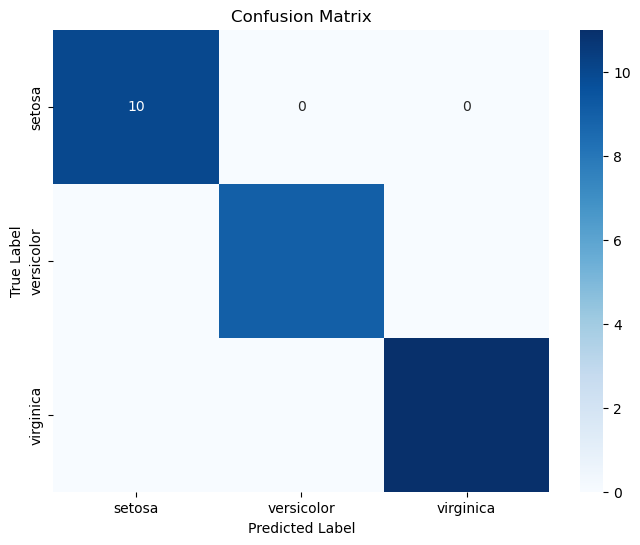

In [17]:
#Visualizing the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [11]:
#Making Predictions

new_data = [[5.1, 3.5, 1.4, 0.2]]
predicted_species = model.predict(new_data)[0]
print("Predicted species:", predicted_species)

Predicted species: Iris-setosa
